In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the data
data_file = 'ASTR19_F24_group_project_data.txt'
data = np.genfromtxt(data_file, dtype=[('day', 'i8'), ('time', 'U6'), ('height', 'f8')])

# Convert time to decimal days
def time_to_decimal(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours / 24 + minutes / (24 * 60)

decimal_time = np.array([d['day'] + time_to_decimal(d['time']) for d in data])
heights = np.array([d['height'] for d in data])

In [2]:
# Oscillatory function with two components
def oscillatory_model(t, A1, omega1, phi1, A2, omega2, phi2, C):
    return (A1 * np.sin(omega1 * t + phi1) +
            A2 * np.sin(omega2 * t + phi2) +
            C)

In [3]:
# Initial guesses for parameters
initial_guess = [3, 2 * np.pi / 24, 0, 2, 2 * np.pi / (24 * 14), 0, 0]
sigma = np.full(len(heights), 0.25)  # Assumed experimental error

# Fit the model
params, covariance = curve_fit(oscillatory_model, decimal_time, heights, p0=initial_guess, sigma=sigma)

# Generate fitted heights
fitted_heights = oscillatory_model(decimal_time, *params)

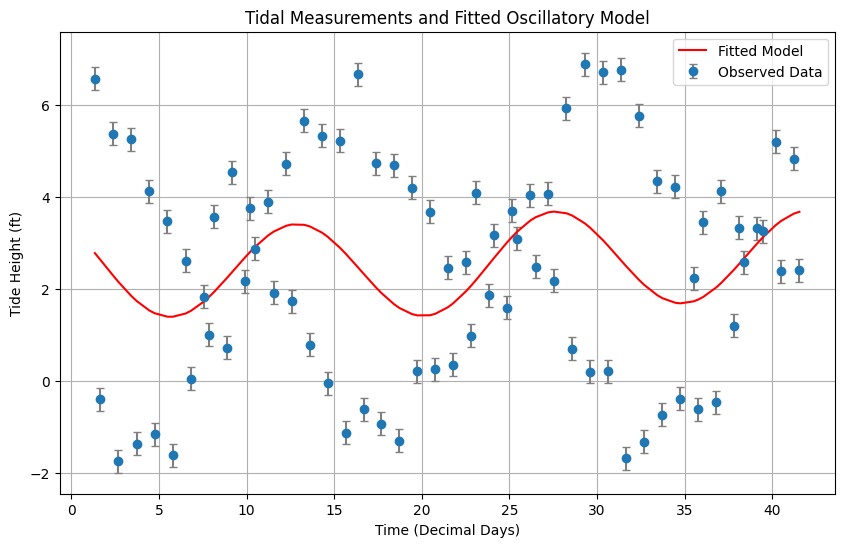

In [4]:
# Plot observed data and fitted model
plt.figure(figsize=(10, 6))
plt.errorbar(decimal_time, heights, yerr=sigma, fmt='o', label='Observed Data', ecolor='gray', capsize=3)
plt.plot(decimal_time, fitted_heights, 'r-', label='Fitted Model')
plt.xlabel('Time (Decimal Days)')
plt.ylabel('Tide Height (ft)')
plt.title('Tidal Measurements and Fitted Oscillatory Model')
plt.legend()
plt.grid(True)

# Save figure
plt.savefig('tide_model_fit.pdf')
plt.show()

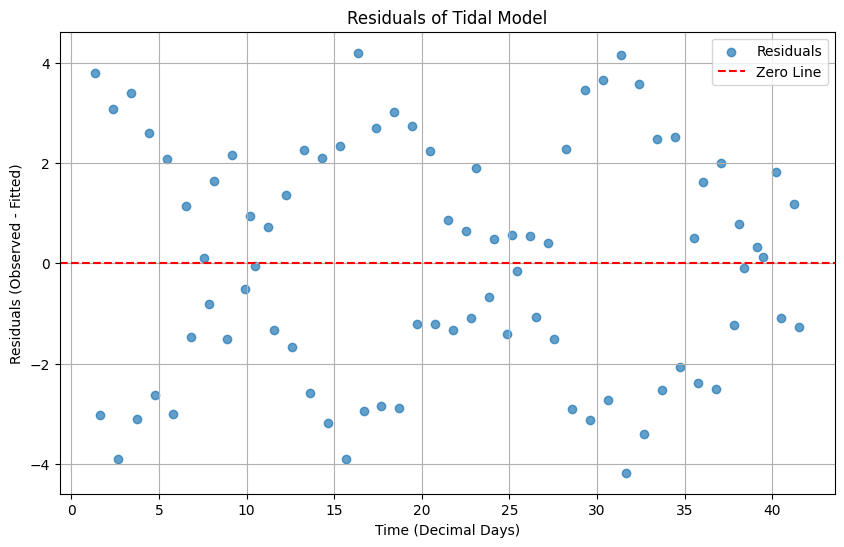

In [5]:
# Residuals = Observed - Fitted
residuals = heights - fitted_heights

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(decimal_time, residuals, alpha=0.7, label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.xlabel('Time (Decimal Days)')
plt.ylabel('Residuals (Observed - Fitted)')
plt.title('Residuals of Tidal Model')
plt.legend()
plt.grid(True)
plt.show()

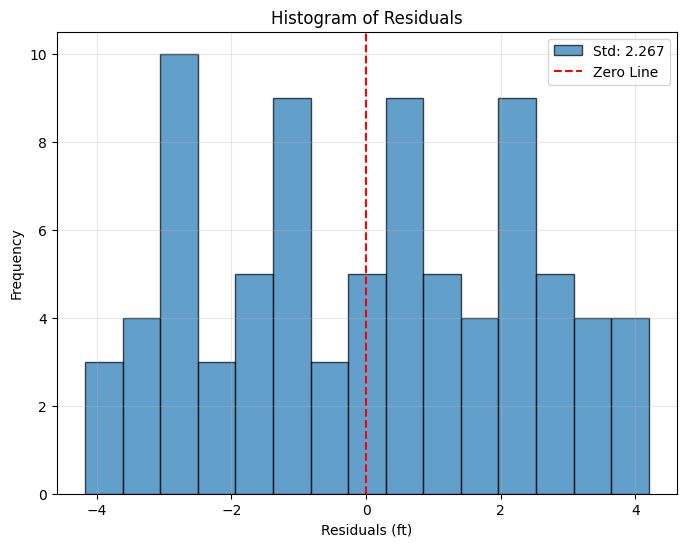

Standard Deviation of Residuals: 2.267
Intrinsic Scatter (after accounting for error): 2.253


In [6]:
# Compute standard deviation of residuals
residual_std = np.std(residuals)

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=15, edgecolor='black', alpha=0.7, label=f'Std: {residual_std:.3f}')
plt.axvline(0, color='red', linestyle='--', label='Zero Line')
plt.xlabel('Residuals (ft)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.legend()
plt.grid(alpha=0.3)

# Save histogram as PDF
plt.savefig('residuals_histogram.pdf')
plt.show()

# Intrinsic scatter
intrinsic_scatter = np.sqrt(residual_std**2 - 0.25**2) if residual_std > 0.25 else 0
print(f"Standard Deviation of Residuals: {residual_std:.3f}")
print(f"Intrinsic Scatter (after accounting for error): {intrinsic_scatter:.3f}")